<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/SMOTE-NearMiss%20with%20Hybrid%20RF-LSTM%20(100%20ep%20%26%20l2%20%3D%200.0001)%20with%20K-folds_10%20classes%20(02052024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SMOTE-NearMiss with Hybrid RF-LSTM (100 ep.) 10 classes**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")

In [3]:
print(dataset.isnull().sum())

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [5]:
print(dataset["Class"].unique())

[0 2 1 5 8 7 4 3 9 6]


In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)  # update to 10 classes
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.000000e+00 1.214780e-01 6.000000e+00 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [2.000000e+00 6.499020e-01 1.400000e+01 ... 1.000000e+00 6.000000e+00
  0.000000e+00]
 [3.000000e+00 1.623129e+00 8.000000e+00 ... 2.000000e+00 6.000000e+00
  0.000000e+00]
 ...
 [1.753390e+05 9.000000e-06 2.000000e+00 ... 3.000000e+00 1.200000e+01
  0.000000e+00]
 [1.753400e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]
 [1.753410e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]]
[0 0 0 ... 6 6 6]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 6: 40000, 4: 33393, 5: 18184, 3: 12264, 7: 10491, 1: 2000, 2: 1746, 8: 1133, 9: 130})


**SMOTE-NearMiss Databalancing**



In [9]:
# Check class distribution
counter = Counter(y)
print("Before SMOTE:", counter)

Before SMOTE: Counter({0: 56000, 6: 40000, 4: 33393, 5: 18184, 3: 12264, 7: 10491, 1: 2000, 2: 1746, 8: 1133, 9: 130})


In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 2: 56000, 1: 56000, 5: 56000, 8: 56000, 7: 56000, 4: 56000, 3: 56000, 9: 56000, 6: 56000})


In [11]:
# Apply NearMiss for undersampling
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print("After NearMiss:", Counter(y_res))

After NearMiss: Counter({0: 56000, 1: 56000, 2: 56000, 3: 56000, 4: 56000, 5: 56000, 6: 56000, 7: 56000, 8: 56000, 9: 56000})


**Data Splitting (Train 80/Test 20)**

In [12]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

**Utilized K-Fold Cross Validation**

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold
# Define the number of classes
num_classes = 10

# Define the number of folds
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [14]:
# Initialize lists to store evaluation metrics for each fold
accuracies = []
recalls = []
precisions = []
f1scores = []
confusion_matrices = []
classification_reports = []

In [15]:
# Iterate through the folds
#for fold, (train_index, test_index) in enumerate(skf.split(X, y.argmax(axis=1))):
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

**Hybrid RF-LSTM for 10 class Ver.2.2**

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape RF features for LSTM input
#train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
#test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, 1))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, 1))

In [ ]:
train_rf_features = train_rf_features[:y_train.shape[0]]
#y_train = np.concatenate((y_train, np.zeros((train_rf_features.shape[0] - y_train.shape[0], 4))))

In [17]:
from tensorflow.keras.utils import to_categorical
# Train LSTM model with RF features
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(10, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)  # One-hot encode y_train

history = lstm_model.fit(train_rf_features, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate hybrid model on test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

Epoch 1/100
6300/6300 [==============================] - 42s 6ms/step - loss: 0.2565 - accuracy: 0.9390 - val_loss: 6.2077 - val_accuracy: 0.0112
Epoch 2/100
6300/6300 [==============================] - 38s 6ms/step - loss: 0.0577 - accuracy: 0.9930 - val_loss: 3.3667 - val_accuracy: 0.0112
Epoch 3/100
6300/6300 [==============================] - 39s 6ms/step - loss: 0.0348 - accuracy: 0.9956 - val_loss: 1.6045 - val_accuracy: 0.5011
Epoch 4/100
6300/6300 [==============================] - 36s 6ms/step - loss: 0.0270 - accuracy: 0.9969 - val_loss: 1.5222 - val_accuracy: 0.5011
Epoch 5/100
6300/6300 [==============================] - 37s 6ms/step - loss: 0.0239 - accuracy: 0.9974 - val_loss: 1.3563 - val_accuracy: 0.5011
Epoch 6/100
6300/6300 [==============================] - 38s 6ms/step - loss: 0.0225 - accuracy: 0.9974 - val_loss: 1.2208 - val_accuracy: 0.5011
Epoch 7/100
6300/6300 [==============================] - 37s 6ms/step - loss: 0.0215 - accuracy: 0.9974 - val_loss: 1.3729 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[5381    6    0    1   14  195    0    1    2    0]
 [   1 4682  404  367   80   27    2   33    4    0]
 [   0  377 4701  275   73   33    2  122   17    0]
 [   0  619  567 3250  851   93    8  171   41    0]
 [   1  220  173  763 4148  106    5  122   62    0]
 [  16  124  122  138   63 5047    3   44   43    0]
 [   0    6    8   40   45    8 5485    2    6    0]
 [   0  167  309  237  113   34    2 4669   69    0]
 [   0    0    0    2    1    3    0    1 5593    0]
 [   0    0    0    0    4    0    0    0 5596    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5600
           1       0.76      0.84      0.79      5600
           2       0.75      0.84      0.79      5600
           3       0.64      0.58      0.61      5600
           4       0.77      0.74      0.75      5600
           5       0.91      0.90      0.91      5600
           6       1.00      0.98      0.99     

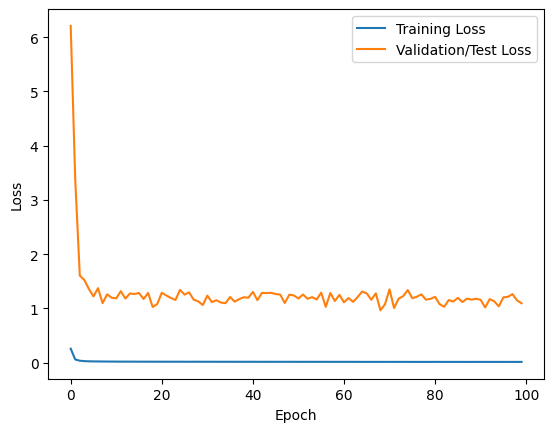

In [18]:
import collections as c

# Calculate the confusion matrix and classification report
# Ensure that y_test and test_rf_lstm_predictions are 2D arrays
confusion = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_report_result = classification_report(y_test, test_rf_lstm_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_result)

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_rf_lstm_predictions)
recall = recall_score(y_test, test_rf_lstm_predictions, average='weighted')
precision = precision_score(y_test, test_rf_lstm_predictions, average='weighted')
f1score = f1_score(y_test, test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_rep = classification_report(y_test, test_rf_lstm_predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7670714285714286
Recall: 0.7670714285714286
Precision: 0.7208927627283052
F1-Score: 0.7344284298443535
Confusion Matrix:
 [[5381    6    0    1   14  195    0    1    2    0]
 [   1 4682  404  367   80   27    2   33    4    0]
 [   0  377 4701  275   73   33    2  122   17    0]
 [   0  619  567 3250  851   93    8  171   41    0]
 [   1  220  173  763 4148  106    5  122   62    0]
 [  16  124  122  138   63 5047    3   44   43    0]
 [   0    6    8   40   45    8 5485    2    6    0]
 [   0  167  309  237  113   34    2 4669   69    0]
 [   0    0    0    2    1    3    0    1 5593    0]
 [   0    0    0    0    4    0    0    0 5596    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      5600
           1       0.76      0.84      0.79      5600
           2       0.75      0.84      0.79      5600
           3       0.64      0.58      0.61      5600
           4       0.77      0.74      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  #plt.figure(figsize=(6,5.5))
  plt.figure(figsize=(8,6.5))
  #ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='tab20c')
  ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuBu",
                 vmin=0, vmax=5600, center=0, square=True, linewidths=1.5)
  sns.set(font_scale=0.8)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid RF-LSTM Model


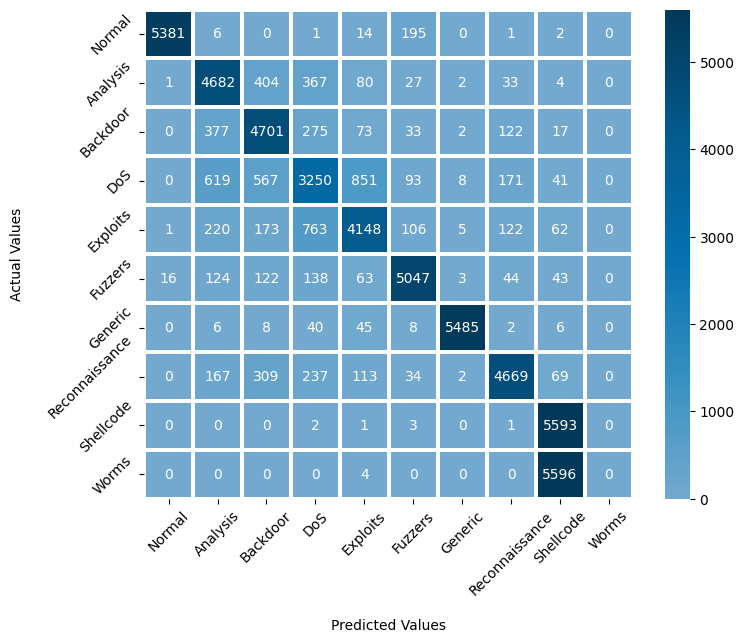

In [21]:
print("Confusion Matrix of Hybrid RF-LSTM Model")
conf_mat(y_test, test_rf_lstm_predictions)

In [22]:
# Compute TP, TN, FP, FN for each class
cm = confusion_matrix(y_test, test_rf_lstm_predictions)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Print FPR and TPR for each class
for i in range(10):
    print(f"Class {i} - FPR: {FPR[i]}, TPR: {TPR[i]}")

Class 0 - FPR: 0.00035714285714285714, TPR: 0.9608928571428571
Class 1 - FPR: 0.03013888888888889, TPR: 0.8360714285714286
Class 2 - FPR: 0.03140873015873016, TPR: 0.8394642857142857
Class 3 - FPR: 0.03617063492063492, TPR: 0.5803571428571429
Class 4 - FPR: 0.02468253968253968, TPR: 0.7407142857142858
Class 5 - FPR: 0.009900793650793651, TPR: 0.90125
Class 6 - FPR: 0.0004365079365079365, TPR: 0.9794642857142857
Class 7 - FPR: 0.009841269841269842, TPR: 0.83375
Class 8 - FPR: 0.11587301587301588, TPR: 0.99875
Class 9 - FPR: 0.0, TPR: 0.0


In [23]:
# prompt: Show the detection rates of the model in 8 digits numerical

# Calculate detection rates and format them to 8 digits
detection_rates = TP / (TP + FN)
detection_rates_formatted = ["{:.10f}".format(rate) for rate in detection_rates]

# Print detection rates
for i, rate in enumerate(detection_rates_formatted):
    print(f"Class {i} Detection Rate: {rate}")


Class 0 Detection Rate: 0.9608928571
Class 1 Detection Rate: 0.8360714286
Class 2 Detection Rate: 0.8394642857
Class 3 Detection Rate: 0.5803571429
Class 4 Detection Rate: 0.7407142857
Class 5 Detection Rate: 0.9012500000
Class 6 Detection Rate: 0.9794642857
Class 7 Detection Rate: 0.8337500000
Class 8 Detection Rate: 0.9987500000
Class 9 Detection Rate: 0.0000000000


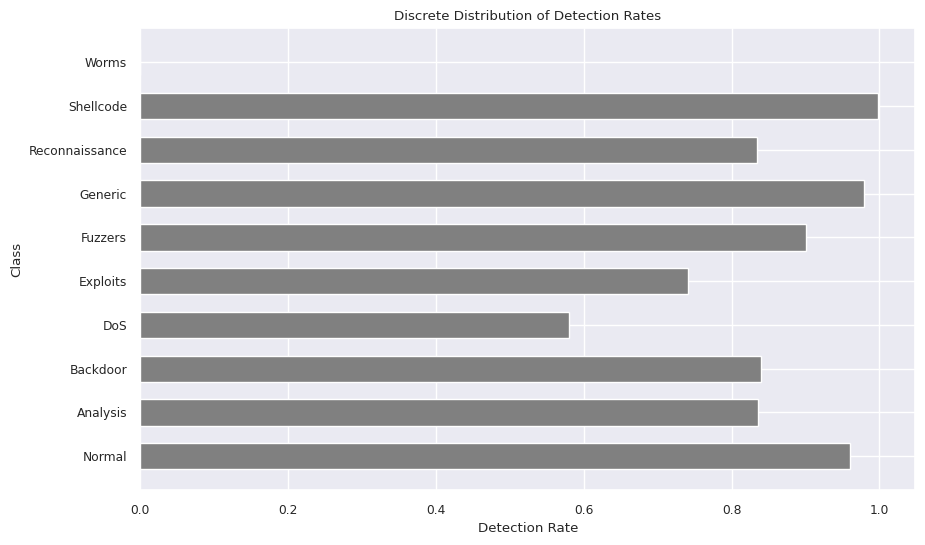

In [24]:
# prompt: Create Discrete distribution as horizontal bar chart of the detection rates of class 0-3

import numpy as np
import matplotlib.pyplot as plt

# Create a list of class labels
class_labels = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']

# Create a list of detection rates
detection_rates = [0.9608928571, 0.8360714286, 0.8394642857, 0.5803571429, 0.7407142857, 0.9012500000, 0.9794642857,
                   0.8337500000, 0.9987500000, 0.0000000000]

# Set the bar width
bar_width = 0.6

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(class_labels, detection_rates, bar_width, align='center', color='grey')

# Set the axis labels and title
plt.xlabel('Detection Rate')
plt.ylabel('Class')
plt.title('Discrete Distribution of Detection Rates')

# Display the chart
plt.show()


1750/1750 [==============================] - 5s 3ms/step


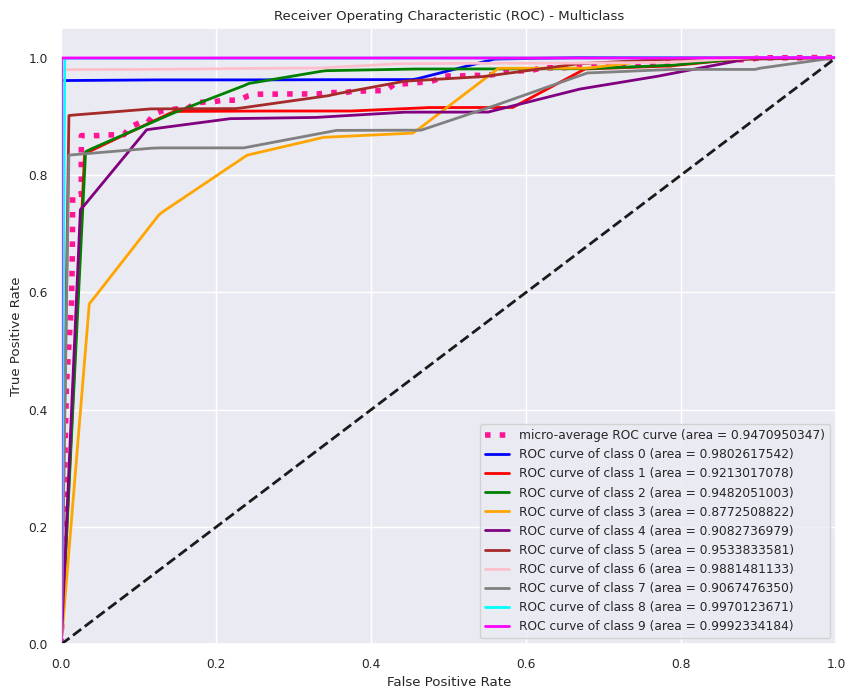

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming that y_test is not one-hot encoded
# Binarize the output labels for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# Predict class probabilities for LSTM model
test_lstm_probs = lstm_model.predict(test_rf_features)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_lstm_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot micro-average ROC curve
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.10f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.10f})'.format(i, roc_auc[i]))

# Plot chance level
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Optionally, you could compute and print the macro-average ROC curve and AUC
# However, this would require computing the average FPR and TPR across all classes,
# which could be misleading in a multiclass setting and thus is often omitted.